In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\Customer Churn Prediction\\Churn_Modelling.csv") 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [17]:
df.Gender.replace({'Female':1,'Male':0},inplace=True)

In [19]:
df = pd.get_dummies(data=df,columns=['Geography'])
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [21]:
cols_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [22]:
X = df.drop('Exited',axis=1)
y = df.Exited

In [44]:
len(X)

10000

In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

In [56]:
len(X_train)

8000

In [57]:
len(X_test)

2000

In [58]:
import tensorflow as tf
from tensorflow import keras

tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [59]:
model = keras.Sequential([
    keras.layers.Dense(6, input_shape = (12,), activation = 'relu'),
    keras.layers.Dense(3, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid'),
])

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train, y_train, epochs=65)

Epoch 1/65
250/250 [==============================] - 1s 3ms/step - loss: 0.5543 - accuracy: 0.7955
Epoch 2/65
250/250 [==============================] - 1s 3ms/step - loss: 0.4984 - accuracy: 0.7981
Epoch 3/65
250/250 [==============================] - 1s 3ms/step - loss: 0.4768 - accuracy: 0.7981
Epoch 4/65
250/250 [==============================] - 1s 3ms/step - loss: 0.4612 - accuracy: 0.7990
Epoch 5/65
250/250 [==============================] - 1s 3ms/step - loss: 0.4513 - accuracy: 0.8034
Epoch 6/65
250/250 [==============================] - 1s 3ms/step - loss: 0.4417 - accuracy: 0.8083
Epoch 7/65
250/250 [==============================] - 1s 3ms/step - loss: 0.4320 - accuracy: 0.8120
Epoch 8/65
250/250 [==============================] - 1s 3ms/step - loss: 0.4230 - accuracy: 0.8184
Epoch 9/65
250/250 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8201
Epoch 10/65
250/250 [==============================] - 1s 3ms/step - loss: 0.4087 - accuracy: 0.8223

In [60]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.3786 - accuracy: 0.8405


[0.37858548760414124, 0.840499997138977]

In [61]:
y_test[:10]

937     0
9355    0
2293    1
192     0
8675    0
53      1
9596    0
265     0
984     0
9793    0
Name: Exited, dtype: int64

In [62]:
yp = model.predict(X_test)
yp[:10]

array([[0.32284588],
       [0.5053779 ],
       [0.5114555 ],
       [0.05472232],
       [0.5217197 ],
       [0.5904973 ],
       [0.19004975],
       [0.3267304 ],
       [0.0116911 ],
       [0.7041427 ]], dtype=float32)

In [63]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [64]:
y_pred[:10]

[0, 1, 1, 0, 1, 1, 0, 0, 0, 1]

In [67]:
y_test[:10]

937     0
9355    0
2293    1
192     0
8675    0
53      1
9596    0
265     0
984     0
9793    0
Name: Exited, dtype: int64

In [65]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1578
           1       0.69      0.45      0.54       422

    accuracy                           0.84      2000
   macro avg       0.78      0.70      0.72      2000
weighted avg       0.83      0.84      0.83      2000



Text(69.0, 0.5, 'Truth')

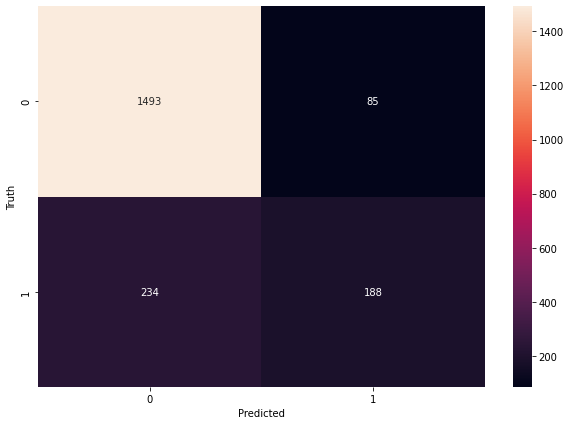

In [66]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')